In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
 
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import objdet.object_detector
import sklearn.base as be
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier


import warnings
warnings.filterwarnings('ignore')

C:\Users\Maria\Miniconda3\envs\objdet\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
def load_dataset(n_samples=40):
    download_dir = r"C:\Users\Maria\Documents\TU Delft\Medical Visualization\Proyecto Clinical Graphics\Object_Detection_in_Medical_Images-2015-11-17\Object Detection in Medical Images\Images"
    boxes = np.load(os.path.join(download_dir, "boxes.npy"))[:n_samples]
    images = []
    for i in range(n_samples):
        image = np.load(os.path.join(download_dir, "image{0:03d}.npy".format(i)))
        images.append(image)
    return boxes, images
boxes, images = load_dataset()

In [48]:
boxes2 = np.asanyarray(boxes)
newbox=boxes[1]

A_x_min, A_y_min = newbox.min(axis=0)
A_x_max, A_y_max = newbox.max(axis=0)
w=A_x_max-A_x_min
h=A_y_max-A_y_min

print('width, height')
print(w,h)

width, height
1203.63661589 1184.3506076


In [3]:
for i, (box, img) in enumerate(zip(boxes, images)):
    # plot image, contour and normal points
    #fig, ax = plt.subplots()
    #fig.suptitle("image {}".format(i))
    #ax.imshow(img.T, cmap=matplotlib.cm.gray)
    #ax.plot(box[:, 0], box[:, 1], "-")
    #ax.set_aspect('equal')
    
    if i == 5:  # use this to stop plotting after the i -th image, or remove to plot all images
        break


In [76]:
# OBJECT DETECTOR IMPLEMENTING NMS AND COMPARING DIFFERENT CLASSIFIERS AGAINS VALUE OF OVERLAP THRESHOLD

select = 24
select_images = images[:select]
select_boxes = boxes[:select]

split = 12
train_images = select_images[:split]
train_boxes = select_boxes[:split]
test_images = select_images[split:]
test_boxes = select_boxes[split:]
 
compare=1

if compare:
    #test_cls=['RandomForest_1','RandomForest_3','RandomForest_5','RandomForest_10', 'RandomForest_20']
    test_cls=['KNeighborsClassifier_k1','KNeighborsClassifier_k5','KNeighborsClassifier_k10',
              'KNeighborsClassifier_k12','KNeighborsClassifier_k20','KNeighborsClassifier_k24',
              'KNeighborsClassifier_k30','KNeighborsClassifier_k50','SVC_C1_rbf','SVC_C0025_linear',
              'SVC_C1_linear','SVC_C2_linear', 'SVC_d2_poly','SVC_d3_poly','SVC_sigmoid',
              'RandomForest_1','RandomForest_3','RandomForest_5','RandomForest_10', 'RandomForest_20']
    test_overlap_threshold_nms=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9]
    scores_nms_per_cls=np.zeros((9,len(test_cls)))
    scores_prob_per_cls=np.zeros((9,len(test_cls)))
    mean_scores_nms=[]
    mean_scores_prob=[]
    for index,clsf in enumerate(test_cls):
        print('classifier=')
        print(clsf)
        for thr in test_overlap_threshold_nms:
            #print('thr value=')
            #print(thr)
            detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=10, 
                                                                scale_fraction=0.0625, 
                                                                overlap_threshold_original=0.6,
                                                                orientations=9, pixels_per_cell=(32, 32), 
                                                                cells_per_block=(3, 3), probability_thr_nms=0.6, 
                                                                overlap_threshold_nms=thr,
                                                                clasfr=clsf)
            detector.fit(train_images, train_boxes, debug=False)
            predicted_boxes_prob, predicted_boxes_nms = detector.predict(test_images,debug=False)
            mean_score_prob,mean_score_nms = detector.mean_score(test_images, test_boxes,
                                                            predicted_boxes_prob, predicted_boxes_nms, debug=False)
            mean_scores_nms.append(mean_score_nms)
            mean_scores_prob.append(mean_score_prob)
        scores_nms_per_cls[:,index]=mean_scores_nms
        scores_prob_per_cls[:,index]=mean_scores_prob
        mean_scores_nms=[]
        mean_scores_prob=[]
    print(scores_per_cls)
    print('********END OF PROGRAM********')
    print(test_cls)
                
                
if compare==0:
    detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=10, 
                                                        scale_fraction=0.0625, 
                                                        overlap_threshold_original=0.6,
                                                        orientations=9, pixels_per_cell=(32, 32), 
                                                        cells_per_block=(3, 3), probability_thr_nms=0.6, 
                                                        overlap_threshold_nms=0.4,
                                                        clasfr='SVC_C0025_linear')

# Possible classifiers:
# clasfr= 'RandomForest'
# clasfr= 'KNeighborsClassifier'
# clasfr= 'SVC'

# clasfr= 'AdaBoostClassifier'
# clasfr= 'DecisionTreeClassifier'  
# clasfr= 'SVC_linear'
# clasfr= 'SVC_C0025_linear'
# clasfr= 'GaussianNB'
# clasfr= 'LinearDiscriminantAnalysis'
# clasfr= 'QuadraticDiscriminantAnalysis'


    detector.fit(train_images, train_boxes, debug=False)
    predicted_boxes_prob, predicted_boxes_nms = detector.predict(test_images,debug=False)
    mean_score_prob,mean_score_nms = detector.mean_score(test_images, test_boxes, predicted_boxes_prob, predicted_boxes_nms, debug=False)
   
    print(predicted_boxes_prob)
    #print('mean_score_nms=', mean_score_nms)


classifier=
KNeighborsClassifier_k1
classifier=
KNeighborsClassifier_k5
classifier=
KNeighborsClassifier_k10
classifier=
KNeighborsClassifier_k12
classifier=
KNeighborsClassifier_k20
classifier=
KNeighborsClassifier_k24
classifier=
KNeighborsClassifier_k30
classifier=
KNeighborsClassifier_k50
classifier=
SVC_C1_rbf
classifier=
SVC_C0025_linear
classifier=
SVC_C1_linear
classifier=
SVC_C2_linear
classifier=
SVC_d2_poly
classifier=
SVC_d3_poly
classifier=
SVC_sigmoid
classifier=
RandomForest_1
classifier=
RandomForest_3
classifier=
RandomForest_5
classifier=
RandomForest_10
classifier=
RandomForest_20
[[ 0.33737008  0.53781582  0.58021164  0.5859107   0.58606455  0.59149686
   0.60702625  0.5960793   0.48523338  0.47929577  0.60004835  0.60004835
   0.32689302  0.55629491  0.          0.03372158  0.33043664  0.54146846
   0.57543219  0.60003343]
 [ 0.33737008  0.53781582  0.58021164  0.5859107   0.58606455  0.59149686
   0.60702625  0.5960793   0.56369678  0.5542442   0.60004835  0.60004

In [77]:
my_score_matrix_nms=scores_nms_per_cls
my_score_matrix_prob=scores_prob_per_cls

In [79]:

print('my_score_matrix_nms')
print(my_score_matrix_nms)
print('my_score_matrix_prob')
print(my_score_matrix_prob)

my_score_matrix_nms
[[ 0.33737008  0.53781582  0.58021164  0.5859107   0.58606455  0.59149686
   0.60702625  0.5960793   0.56369678  0.5515432   0.60680291  0.60004835
   0.45302375  0.55629491  0.          0.23374341  0.47072892  0.53267735
   0.58863124  0.55896419]
 [ 0.33737008  0.53781582  0.58021164  0.5859107   0.58606455  0.59149686
   0.60702625  0.5960793   0.55953549  0.57353583  0.60004835  0.60004835
   0.27728719  0.55629491  0.          0.32106783  0.54852867  0.50166085
   0.59111094  0.60501895]
 [ 0.33737008  0.53781582  0.58021164  0.5859107   0.58606455  0.59149686
   0.60702625  0.5960793   0.49242707  0.55953549  0.60004835  0.60004835
   0.4903744   0.55629491  0.          0.35136665  0.33640798  0.55002418
   0.53729938  0.59350221]
 [ 0.33737008  0.53781582  0.58021164  0.5859107   0.58606455  0.59149686
   0.60702625  0.5960793   0.5515432   0.55953549  0.60004835  0.60004835
   0.41215466  0.55629491  0.          0.4296376   0.46359905  0.5081351
   0.5993599

<IPython.core.display.Javascript object>


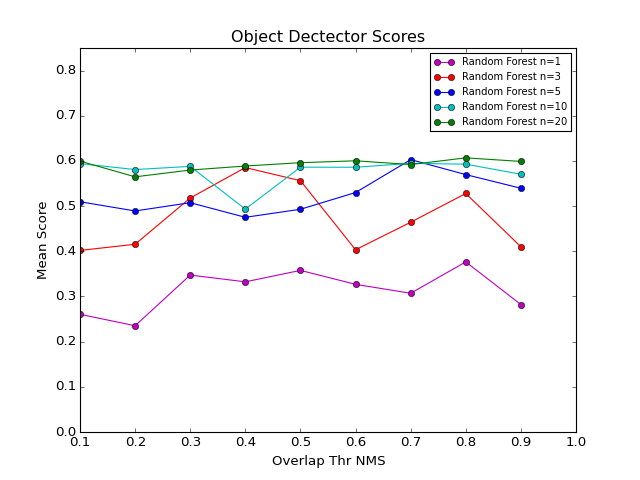

In [68]:
# PRINT SCORES OF DIFFERENT CLASSIFIERS
import pylab as pl


y1=my_score_matrix[:,0] # RandomForest classifier
y2=my_score_matrix[:,1] # KNeighbours clasf.
y3=my_score_matrix[:,2] # SVC clasf.
y4=my_score_matrix[:,3] # AdaBoost clasf.
y5=my_score_matrix[:,4] # GaussianNB clasf.
#y6=my_score_matrix[:,5] # GaussianNB clasf.
#y7=my_score_matrix[:,6] # GaussianNB clasf.
#y8=my_score_matrix[:,7] # GaussianNB clasf.
# y9=my_score_matrix[:,8] # GaussianNB clasf.
# y10=my_score_matrix[:,9] # GaussianNB clasf.
x=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9] # NMS overlap thrs



    
fig, axs = plt.subplots()
# linear
# axs.scatter(x, y1,marker='o',label='RandomForest CLSF')
pl.plot(x, y1, 'm-o',label='Random Forest n=1')
pl.plot(x, y2, 'r-o',label='Random Forest n=3')
pl.plot(x, y3, 'b-o',label='Random Forest n=5')
pl.plot(x, y4, 'c-o',label='Random Forest n=10')
pl.plot(x, y5, 'g-o',label='Random Forest n=20')
#pl.plot(x, y6, 'b-^',label='K Neighbors k=24')
#pl.plot(x, y7, 'm-^',label='K Neighbors k=30')
#pl.plot(x, y8, 'g-^',label='K Neighbors k=35')
#pl.plot(x, y9, 'c-^',label='SVC C=0.025 linear')
#pl.plot(x, y10, 'k-^',label='Decision Tree')



pl.xlabel('Overlap Thr NMS')
pl.ylabel('Mean Score')
pl.title('Object Dectector Scores')
pl.ylim(0, 0.85)
pl.legend(loc=1, prop={"size":9})


In [31]:
# OBJECT DETECTOR USING K NEIGHBORS WITH DIFFERENT K VALUES

select = 24
select_images = images[:select]
select_boxes = boxes[:select]

split = 12
train_images = select_images[:split]
train_boxes = select_boxes[:split]
test_images = select_images[split:]
test_boxes = select_boxes[split:]
 

test_cls=['KNeighborsClassifier_k1','KNeighborsClassifier_k5','KNeighborsClassifier_k10','KNeighborsClassifier_k12',
          'KNeighborsClassifier_k15','KNeighborsClassifier_k20','KNeighborsClassifier_k24','KNeighborsClassifier_k25',
          'KNeighborsClassifier_k30','KNeighborsClassifier_k35','KNeighborsClassifier_k40','KNeighborsClassifier_k45',
          'KNeighborsClassifier_k50']

K_values=[1, 5, 10, 12, 15, 20, 24, 25, 30 ,35,40,45,50]
scores_per_k=np.zeros((9,len(test_cls)))
mean_scores=[]
for index,clsf in enumerate(test_cls):
    print('Clasfr:')
    print(clsf)
    detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=10, 
                                                        scale_fraction=0.0625, 
                                                        overlap_threshold_original=0.6,
                                                        orientations=9, pixels_per_cell=(32, 32), 
                                                        cells_per_block=(3, 3), probability_thr_nms=0.6, 
                                                        overlap_threshold_nms=0.6,
                                                        clasfr=clsf)
    detector.fit(train_images, train_boxes, debug=False)
    predicted_boxes_prob, predicted_boxes_nms = detector.predict(test_images,debug=False)
    mean_score_prob,mean_score_nms = detector.mean_score(test_images, test_boxes,
                                                    predicted_boxes_prob, predicted_boxes_nms, debug=False)
    mean_scores.append(mean_score_nms)


print(mean_scores)
print('********END OF PROGRAM********')

print('Maximum score value for K= ')
K_values[mean_scores.index(max(mean_scores))]


Clasfr:
KNeighborsClassifier_k1
Clasfr:
KNeighborsClassifier_k5
Clasfr:
KNeighborsClassifier_k10
Clasfr:
KNeighborsClassifier_k12
Clasfr:
KNeighborsClassifier_k15
Clasfr:
KNeighborsClassifier_k20
Clasfr:
KNeighborsClassifier_k24
Clasfr:
KNeighborsClassifier_k25
Clasfr:
KNeighborsClassifier_k30
Clasfr:
KNeighborsClassifier_k35
Clasfr:
KNeighborsClassifier_k40
Clasfr:
KNeighborsClassifier_k45
Clasfr:
KNeighborsClassifier_k50
[0.33737008226992748, 0.5378158150614859, 0.58021163964852462, 0.58591070478562435, 0.58591070478562435, 0.58606454528030782, 0.59149686334359852, 0.59149686334359852, 0.60702624886550727, 0.60680291023845345, 0.60680291023845345, 0.60151161986578261, 0.59607930180249191]
********END OF PROGRAM********


<IPython.core.display.Javascript object>


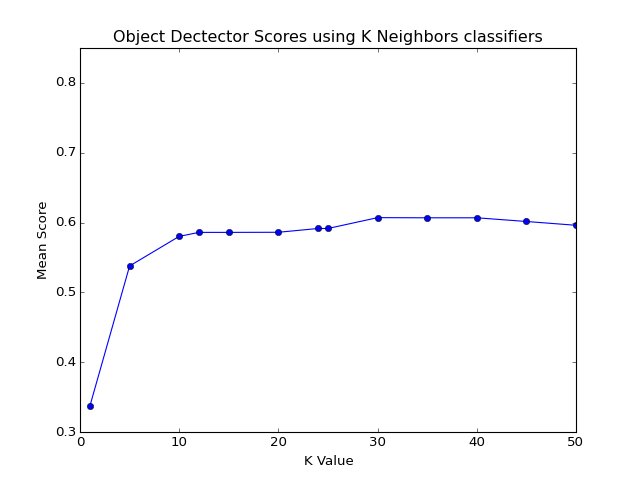

(0.3, 0.85)

In [32]:
import pylab as pl


y=mean_scores# RandomForest classifier
x=K_values # NMS overlap thrs
    
fig, axs = plt.subplots()
# linear
# axs.scatter(x, y1,marker='o',label='RandomForest CLSF')
pl.plot(x, y, 'b-o')
#pl.plot(x, y2, 'r-o',label='K Neighbors k=5')
#pl.plot(x, y3, 'b-o',label='K Neighbors k=10')
#pl.plot(x, y4, 'c-o',label='K Neighbors k=12')
#pl.plot(x, y5, 'g-o',label='K Neighbors k=20')
#pl.plot(x, y6, 'b-^',label='K Neighbors k=24')
#pl.plot(x, y7, 'm-^',label='K Neighbors k=30')
#pl.plot(x, y8, 'g-^',label='K Neighbors k=35')
#pl.plot(x, y9, 'c-^',label='SVC C=0.025 linear')
#pl.plot(x, y10, 'k-^',label='Decision Tree')

pl.xlabel('K Value')
pl.ylabel('Mean Score')
pl.title('Object Dectector Scores using K Neighbors classifiers')
pl.ylim(0.3, 0.85)
#pl.legend(loc=1, prop={"size":9})


In [81]:
# OBJECT DETECTOR COMPARING SCORES WITH DIFFERENT CLASSIFIERS AGAINS STEP_SIZES

select = 24
select_images = images[:select]
select_boxes = boxes[:select]

split = 12
train_images = select_images[:split]
train_boxes = select_boxes[:split]
test_images = select_images[split:]
test_boxes = select_boxes[split:]
 
compare=1

if compare:
    test_cls=['RandomForest_1','RandomForest_3','RandomForest_5','RandomForest_10', 'RandomForest_20']
    #test_cls=['KNeighborsClassifier_k1','KNeighborsClassifier_k5','KNeighborsClassifier_k10','KNeighborsClassifier_k12','KNeighborsClassifier_k20','KNeighborsClassifier_k24','KNeighborsClassifier_k30','KNeighborsClassifier_k50']
    step_sizes=[2,5,10]
    scores_per_cls=np.zeros((3,len(test_cls)))
    mean_scores=[]
    for index,clsf in enumerate(test_cls):
        print('classifier=')
        print(clsf)
        for step in step_sizes:
            #print('thr value=')
            #print(thr)
            detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=step, 
                                                                scale_fraction=0.0625,  
                                                                overlap_threshold_original=0.6, 
                                                                orientations=9, pixels_per_cell=(32, 32),  
                                                                cells_per_block=(3, 3), probability_thr_nms=0.6,  
                                                                overlap_threshold_nms=0.6, 
                                                                clasfr=clsf)
            detector.fit(train_images, train_boxes, debug=False)
            predicted_boxes_prob, predicted_boxes_nms = detector.predict(test_images,debug=False)
            mean_score_prob,mean_score_nms = detector.mean_score(test_images, test_boxes,
                                                            predicted_boxes_prob, predicted_boxes_nms, debug=False)
            mean_scores.append(mean_score_nms)
        scores_per_cls[:,index]=mean_scores
        mean_scores=[]
    print('scores_per_cls=')
    print(scores_per_cls)
    print('********END OF PROGRAM********')
                
                
if compare==0:
    detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=10, 
                                                        scale_fraction=0.0625, 
                                                        overlap_threshold_original=0.6,
                                                        orientations=9, pixels_per_cell=(32, 32), 
                                                        cells_per_block=(3, 3), probability_thr_nms=0.6, 
                                                        overlap_threshold_nms=0.4,
                                                        clasfr='SVC_C0025_linear')


    detector.fit(train_images, train_boxes, debug=False)
    predicted_boxes_prob, predicted_boxes_nms = detector.predict(test_images,debug=False)
    mean_score_prob = detector.score(test_images, test_boxes,predicted_boxes_prob, predicted_boxes_nms, debug=False)
   
    print(mean_score_prob)
    #print('mean_score_nms=', mean_score_nms)




classifier=
RandomForest_1
classifier=
RandomForest_3
classifier=
RandomForest_5
classifier=
RandomForest_10
classifier=
RandomForest_20
scores_per_cls=
[[ 0.27479954  0.54237286  0.5244023   0.53186141  0.59030276]
 [ 0.378194    0.50167244  0.57273542  0.60070669  0.60189825]
 [ 0.37657315  0.58582466  0.56751337  0.54993503  0.59894297]]
********END OF PROGRAM********


In [164]:
my_score_matrix_prob=[[ 0.43807073,  0.60084976 , 0.60159393 , 0.60680291 , 0.59149686,  0.59149686,
   0.60702625,  0.5960793 ,  0.57353583 , 0.57353583 , 0.60004835 , 0.60004835,
   0.51938575,  0.55629491,  0.       ,   0.25596688,  0.531398  ,  0.53267735,
   0.59392253 , 0.55896419],
 [ 0.43807073 , 0.60084976 , 0.60159393 , 0.60680291 , 0.59149686 , 0.59149686,
   0.60702625 , 0.5960793  , 0.57353583 , 0.57353583  ,0.60004835 , 0.60004835,
   0.51938575 , 0.55629491 , 0.       ,   0.41158009 , 0.55956124 , 0.49386378,
   0.59640223 , 0.60501895],
 [ 0.43807073 , 0.60084976 , 0.60159393 , 0.60680291  ,0.59149686 , 0.59149686,
  0.60702625,0.5960793  , 0.57353583 , 0.57353583 , 0.60004835,  0.60004835,
   0.51938575 , 0.55629491  ,0.    ,      0.42530318 , 0.38788399 , 0.55568318,
   0.53729938 , 0.59350221],
 [ 0.43807073 , 0.60084976  ,0.60159393 , 0.60680291 , 0.59149686 , 0.59149686,
   0.60702625 , 0.5960793  , 0.57353583 , 0.57353583 , 0.60004835 , 0.60004835,
   0.51938575 , 0.55629491 , 0.        ,  0.49121876,  0.56046944 , 0.5081351,
   0.59935995 , 0.57456157],
 [ 0.43807073 , 0.60084976  ,0.60159393 , 0.60680291 , 0.59149686 , 0.59149686,
   0.60702625 , 0.5960793  , 0.57353583 , 0.57353583 , 0.60004835 , 0.60004835,
   0.51938575 , 0.55629491  ,0.       ,   0.30104345 , 0.45538695 , 0.56232843,
   0.59812987 , 0.60592087],
 [ 0.43807073  ,0.60084976 , 0.60159393  ,0.60680291 , 0.59149686 , 0.59149686,
   0.60702625,  0.5960793 ,  0.57353583 , 0.57353583 , 0.60004835 , 0.60004835,
   0.51938575,  0.55629491 , 0.        ,  0.51808264 , 0.58864802 , 0.48465865,
   0.58920197, 0.5857112 ],
 [ 0.43807073  ,0.60084976 , 0.60159393 , 0.60680291,  0.59149686 , 0.59149686,
   0.60702625  ,0.5960793 ,  0.57353583 , 0.57353583 , 0.60004835 , 0.60004835,
   0.51938575 , 0.55629491 , 0.   ,       0.48101683 , 0.52380892 , 0.48627971,
   0.59030735  ,0.59728427],
 [ 0.43807073 , 0.60084976,  0.60159393  ,0.60680291,  0.59149686 , 0.59149686,
   0.60702625,  0.5960793  , 0.57353583 , 0.57353583,  0.60004835 , 0.60004835,
   0.51938575 , 0.55629491,  0.         , 0.25014959, 0.54983874  ,0.53480139,
   0.59332393  ,0.53192711],
 [ 0.43807073 , 0.60084976,  0.60159393 , 0.60680291 , 0.59149686 , 0.59149686,
   0.60702625 , 0.5960793 ,  0.57353583,  0.57353583 , 0.60004835 , 0.60004835,
   0.51938575 , 0.55629491  ,0.    ,      0.38508637 , 0.58146385 , 0.57566135,
   0.5549838 ,  0.59958663]]


my_score_matrix_nms=[[ 0.33737008 , 0.53781582 , 0.58021164 , 0.5859107  , 0.58606455 , 0.59149686,
   0.60702625  ,0.5960793  , 0.56369678 , 0.5515432  , 0.60680291 , 0.60004835,
   0.45302375 , 0.55629491 ,0.       ,   0.23374341 , 0.47072892 , 0.53267735,
   0.58863124 , 0.55896419],
 [ 0.33737008 , 0.53781582 , 0.58021164 , 0.5859107  , 0.58606455,  0.59149686,
   0.60702625  ,0.5960793 ,  0.55953549,  0.57353583 , 0.60004835 , 0.60004835,
   0.27728719 , 0.55629491 , 0.        ,  0.32106783 , 0.54852867  ,0.50166085,
   0.59111094 , 0.60501895],
 [ 0.33737008 , 0.53781582 , 0.58021164 , 0.5859107   ,0.58606455 , 0.59149686,
   0.60702625 , 0.5960793 ,  0.49242707 , 0.55953549 , 0.60004835,  0.60004835,
   0.4903744  , 0.55629491 , 0.        ,  0.35136665 , 0.33640798  ,0.55002418,
   0.53729938  ,0.59350221],
 [ 0.33737008  ,0.53781582  ,0.58021164,  0.5859107  , 0.58606455  ,0.59149686,
   0.60702625,  0.5960793  , 0.5515432  , 0.55953549 , 0.60004835 , 0.60004835,
   0.41215466 , 0.55629491 , 0.        ,  0.4296376  , 0.46359905 , 0.5081351,
   0.59935995 , 0.57456157],
 [ 0.33737008,  0.53781582 , 0.58021164 , 0.5859107  , 0.58606455 ,0.59149686,
   0.60702625 , 0.5960793  , 0.48523338,  0.57290472 , 0.60680291 ,0.60004835,
   0.4903744  , 0.55629491 , 0.       ,   0.38964823  ,0.44947786  ,0.546661,
   0.59812987 , 0.60592087],
 [ 0.33737008 , 0.53781582 , 0.58021164 , 0.5859107  , 0.58606455 , 0.59149686,
   0.60702625 , 0.5960793 ,  0.56369678,  0.55953549,  0.60004835,  0.60004835,
   0.50111985 ,0.55629491 , 0.         , 0.34875188 , 0.58083217,  0.46953459,
   0.58920197  ,0.5857112 ],
 [ 0.33737008 , 0.53781582  ,0.58021164 , 0.5859107 ,  0.58606455  ,0.59149686,
   0.60702625 , 0.5960793  , 0.55953549 , 0.57353583 , 0.60680291  ,0.60680291,
   0.4317558  , 0.55629491 , 0.        ,  0.35720332 , 0.49222344 , 0.48627971,
   0.59030735 , 0.59728427],
 [ 0.33737008  ,0.53781582  ,0.58021164 , 0.5859107  , 0.58606455 , 0.59149686,
   0.60702625 , 0.5960793  , 0.53921179  ,0.57353583 , 0.60680291 , 0.60004835,
   0.48771257 , 0.55629491,  0.        ,  0.11209535 , 0.54983874  ,0.48466766,
   0.59332393 , 0.53192711],
 [ 0.33737008 , 0.53781582,  0.58021164 , 0.5859107 ,  0.58606455  ,0.59149686,
   0.60702625 , 0.5960793 ,  0.56345214 , 0.56874343 , 0.60680291  ,0.60680291,
   0.41945946 , 0.55629491,  0.         , 0.2991163  , 0.55177823  ,0.57297229,
   0.5549838  , 0.59958663]]



0.60702625
0.60702625
0.60702625
0.60702625
0.60702625
0.60702625
0.60702625
0.60702625
0.60702625


<IPython.core.display.Javascript object>


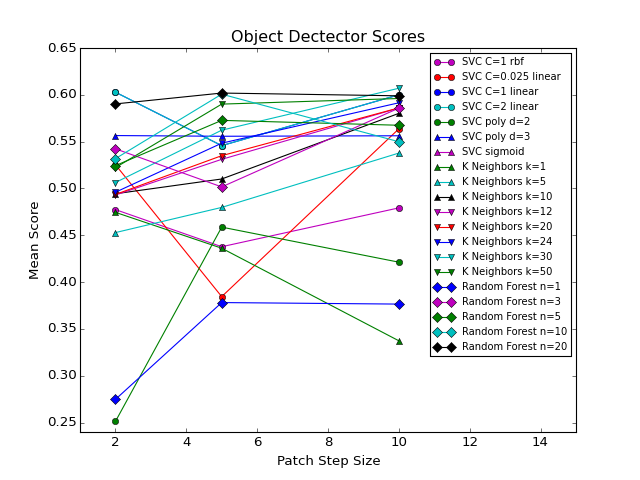

[0.0, 0.0, 0.0]


In [147]:
# PRINT SCORES OF DIFFERENT CLASSIFIERS
import pylab as pl


x=[2, 5, 10] # NMS overlap thrs



    
fig, axs = plt.subplots()
# linear
# axs.scatter(x, y1,marker='o',label='RandomForest CLSF')
pl.plot(x, y1, 'm-o',label='SVC C=1 rbf')
pl.plot(x, y2, 'r-o',label='SVC C=0.025 linear')
pl.plot(x, y3, 'b-o',label='SVC C=1 linear')
pl.plot(x, y4, 'c-o',label='SVC C=2 linear')
pl.plot(x, y5, 'g-o',label='SVC poly d=2')
pl.plot(x, y6, 'b-^',label='SVC poly d=3')
pl.plot(x, y7, 'm-^',label='SVC sigmoid')
pl.plot(x, y8, 'g-^',label='K Neighbors k=1')
pl.plot(x, y9, 'c-^',label='K Neighbors k=5')
pl.plot(x, y10, 'k-^',label='K Neighbors k=10')
pl.plot(x, y11, 'm-v',label='K Neighbors k=12')
pl.plot(x, y12, 'r-v',label='K Neighbors k=20')
pl.plot(x, y13, 'b-v',label='K Neighbors k=24')
pl.plot(x, y14, 'c-v',label='K Neighbors k=30')
pl.plot(x, y15, 'g-v',label='K Neighbors k=50')
pl.plot(x, y16, 'b-D',label='Random Forest n=1')
pl.plot(x, y17, 'm-D',label='Random Forest n=3')
pl.plot(x, y18, 'g-D',label='Random Forest n=5')
pl.plot(x, y19, 'c-D',label='Random Forest n=10')
pl.plot(x, y20, 'k-D',label='Random Forest n=20')

print(y7)

pl.xlabel('Patch Step Size')
pl.ylabel('Mean Score')
pl.title('Object Dectector Scores')
pl.xlim(1,15)
pl.ylim(0.24, 0.65)
pl.legend(loc=1, prop={"size":9})

Automatically created module for IPython interactive environment
train_features=
[[ 0.00504805  0.00338119  0.00469502 ...,  0.00764127  0.00545032
   0.0066891 ]
 [ 0.00267999  0.00151548  0.01297968 ...,  0.00884799  0.00805725
   0.00990099]
 [ 0.00289999  0.00207467  0.01369376 ...,  0.01678612  0.01166176
   0.01168734]
 ..., 
 [ 0.00780853  0.00719002  0.00670279 ...,  0.01213214  0.00810291
   0.00556971]
 [ 0.00869681  0.00738274  0.01241183 ...,  0.00628105  0.00431369
   0.00337604]
 [ 0.01017916  0.01402888  0.02241436 ...,  0.00511489  0.0031436
   0.00346835]]
train_labels=
[ 0.  0.  0. ...,  0.  0.  0.]
len(train_features)=
2658
len(train_labels)=
2658
prediction=
[[ 0.99469835  0.00530165]
 [ 0.99742388  0.00257612]
 [ 0.99742006  0.00257994]
 ..., 
 [ 0.97543095  0.02456905]
 [ 0.98995368  0.01004632]
 [ 0.99502054  0.00497946]]
len(prediction)=
2658
max(prediction[:,1])=
0.999998731818
len(prediction[:,1])=
2658


<IPython.core.display.Javascript object>


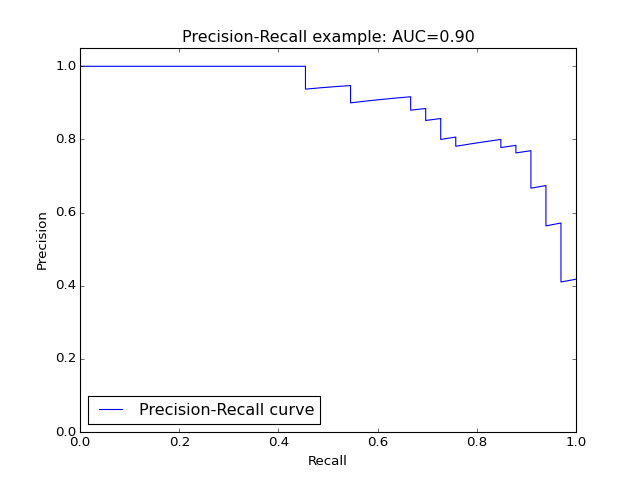

In [178]:
# ANALYZING CLASSIFIER PERFOMANCE 
# PRECISION-RECALL

print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

# Binarize the output
#y = label_binarize(y, classes=[0, 1, 2])
#n_classes = y.shape[1]

# Add noisy features
#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Split into training and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=random_state)

# set our data
select = 24
select_images = images[:select]
select_boxes = boxes[:select]

split = 12
train_images = select_images[:split]
train_boxes = select_boxes[:split]
test_images = select_images[split:]
test_boxes = select_boxes[split:]
# MORE LIKE THE NAME OF classifier = svm.SVC(probability=True,C=0.025, kernel="linear") 
detector = objdet.object_detector.ObjectDetectorHOG(patch_size=(96, 96), step_size=10, 
                                                    scale_fraction=0.0625, 
                                                    overlap_threshold_original=0.6,
                                                    orientations=9, pixels_per_cell=(32, 32), 
                                                    cells_per_block=(3, 3), probability_thr_nms=0.6, 
                                                    overlap_threshold_nms=0.6,
                                                    clasfr='SVC_C0025_linear')
precision, recall, average_precision=detector.classifier_performance(train_images, train_boxes, test_images, test_boxes, debug=True)


fig, axs = plt.subplots()
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()


In [70]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)


In [169]:
a=[1,2,3,4]
length(a)

NameError: name 'length' is not defined

In [17]:
# ANALYZING CLASSIFIER PERFOMANCE 
# ROC

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import sklearn.svm as svm

# Import some data to play with
iris = datasets.load_iris()
X_train = train_boxes
X_test = test_boxes
train_images
test_images

# Learn to predict each class against the other
classifier = svm.SVC(probability=True,C=0.025, kernel="linear")
#scores = classifier.fit(train_boxes).decision_function(test_boxes) # is it doing fit+pred+score at the same time?


# alternative: score give more than one score (not the mean)
#scores_prob,_= detector.score(test_images, test_boxes,predicted_boxes_prob, debug=False)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_boxes.ravel(), scores_probe.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += inteñrp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Automatically created module for IPython interactive environment


TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
import numpy as np
from sklearn import metrics
 y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr
array([ 0. ,  0.5,  0.5,  1. ])
tpr
array([ 0.5,  0.5,  1. ,  1. ])
thresholds
array([ 0.8 ,  0.4 ,  0.35,  0.1 ])